# Graded assignment 3

# 1. Import required libraries and read the dataset.

In [40]:
# load libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# load dataset
df = pd.read_csv("download.csv")

# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
# first few samples
df.head(5)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [4]:
# Shape (rows, columns)
df.shape

(614, 13)

In [5]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [13]:
# different features
df.describe()

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# Statistical summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
dependents,599.0,0.762938,1.015216,0.0,0.0,0.0,2.00,3.0
applicantincome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
coapplicantincome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
loanamount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
loan_amount_term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
credit_history,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [7]:
# Statistical summary of categorical columns
df.describe(include = 'O').T

,count,unique,top,freq
loan_id,614,614,lp001002,1
gender,601,2,male,489
married,611,2,yes,398
education,614,2,graduate,480
self_employed,582,2,no,500
property_area,614,3,semiurban,233
loan_status,614,2,y,422


# 3. Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features. 

In [9]:
# Missing values
df.isnull().sum()/len(df)*100

loan_id              0.000000
gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

The dataset has missing values in all columns except loan_id, education, applicantincome, coapplicantincome, property_area, loan_status

In [10]:
#Treating missing values
# Selecting object(categorical) columns
categorical_columns = df.select_dtypes(include=['object']).columns

# non-object(numerical) columns
numerical_columns = df.select_dtypes(exclude=['object']).columns

# for numerical columns imputing missing values with median
for column in numerical_columns:
    df[column] = df[column].fillna(df[column].median())

# for categorical columns, with mode
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode().iloc[0])

In [11]:
#checking changed features
df.isnull().sum()/len(df) * 100

loan_id              0.0
gender               0.0
married              0.0
dependents           0.0
education            0.0
self_employed        0.0
applicantincome      0.0
coapplicantincome    0.0
loanamount           0.0
loan_amount_term     0.0
credit_history       0.0
property_area        0.0
loan_status          0.0
dtype: float64

In [12]:
# Drop redundant features
# first lets see all the columns
df.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [13]:
# Drop redundant features
df=df.drop(['loan_id'],axis=1)

In [14]:
# after dropping redundant columns and duplicate records
# new dataset has (rows , column)
df.shape

(614, 12)

"Loan ID" is a unique identifier and doesn't provide any meaningful information about loan eligibility. It's merely an identifier for each loan application and doesn't contribute to predicting whether a loan will be approved or not.

# 4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations.

In [15]:
df.columns

Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

### In all the plots below, 
### blue bar 'y' = yes (loan approved)
### orange bar 'n' = no (loan not approved)

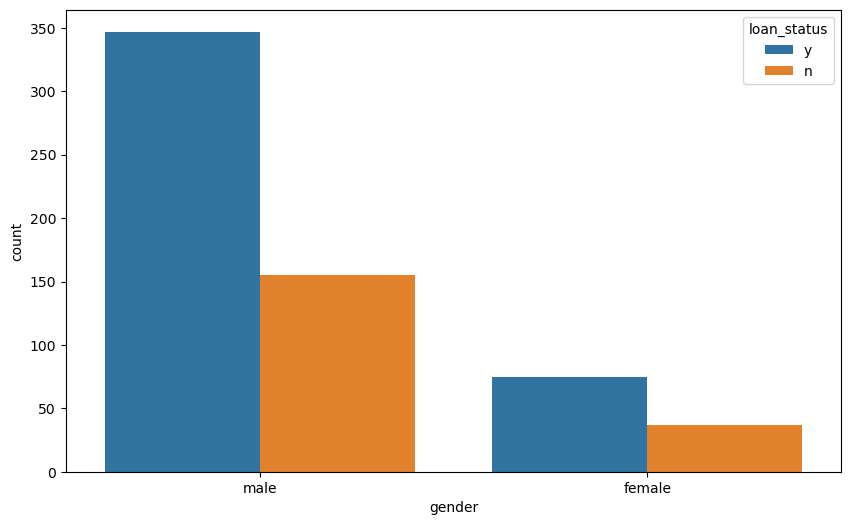

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='loan_status', data=df)
plt.show()

In the 'Male' category:
The bar indicates that large number of male applicants had their loans approved compared to those who were not approved.
In the 'Female' category:
A higher number of female applicants had their loans approved compared to those who were not approved, although the difference is less pronounced compared to males.

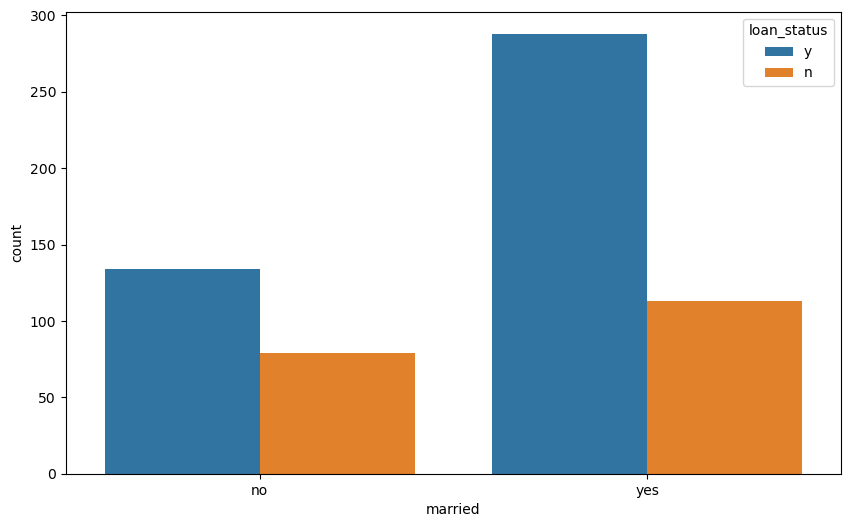

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='married', hue='loan_status', data=df)
plt.show()

In case of unmarried people the loan approval is less than those of married.
Whereas the number of non-approvals of the loan is kind of close in both married and unmarried people.
By this we can say that marital status has very less to do with loan being not approved.

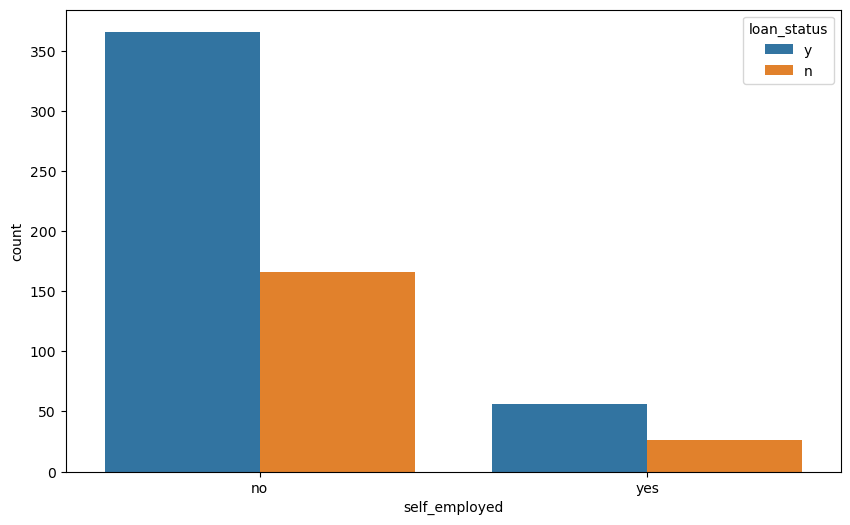

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='self_employed', hue='loan_status', data=df)
plt.show()

This observation highlights the impact of self-employment status on loan approval rates, with self-employed individuals facing a higher rate of loan rejection compared to non-self-employed individuals.

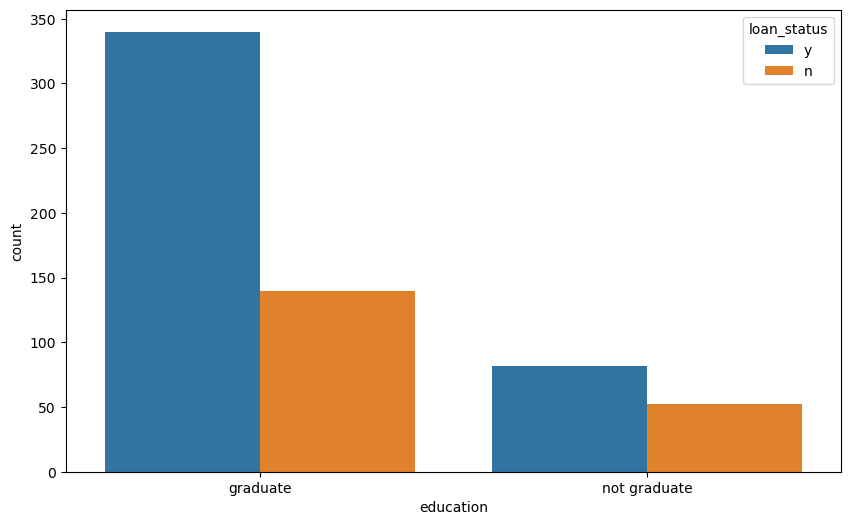

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='loan_status', data=df)
plt.show()

The number of loan approval to graduates is quite high compared to the non-graduates. Despite the higher number of approved loans for graduates, there is also a higher number of non-approved loans compared to non-graduates.
Overall, this observation suggests that educational attainment, specifically being a graduate, is an influential factor in loan approval decisions.

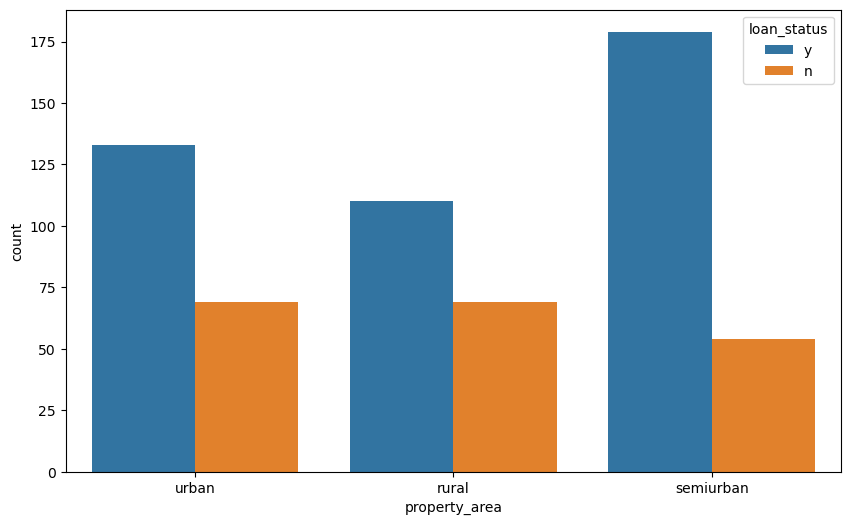

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='property_area', hue='loan_status', data=df)
plt.show()

Semi-urban regions exhibit a higher propensity for loan approval compared to urban and rural areas, implying potential factors such as income stability or property value.

# 5. Encode the categorical data. 

In [17]:
# copy of the cleaned dataset.
df_cleaned = df.copy()

In [19]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
le = LabelEncoder()
for i in cat_cols:
    df[i] = df[[i]].apply(le.fit_transform).astype('int32')

df.head(5)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0.0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             614 non-null    int32  
 1   married            614 non-null    int32  
 2   dependents         614 non-null    float64
 3   education          614 non-null    int32  
 4   self_employed      614 non-null    int32  
 5   applicantincome    614 non-null    int64  
 6   coapplicantincome  614 non-null    float64
 7   loanamount         614 non-null    float64
 8   loan_amount_term   614 non-null    float64
 9   credit_history     614 non-null    float64
 10  property_area      614 non-null    int32  
 11  loan_status        614 non-null    int32  
dtypes: float64(5), int32(6), int64(1)
memory usage: 43.3 KB


After encoding the categorical columns , the dataset is all numerical type. Now lets convert all floats to integers

In [25]:
df['dependents'] = df['dependents'].astype(int)
df['loan_amount_term'] = df['loan_amount_term'].astype(int)
df['loanamount'] = df['loanamount'].astype(int)
df['credit_history'] = df['credit_history'].astype(int)
df['coapplicantincome'] = df['coapplicantincome'].astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   gender             614 non-null    int32
 1   married            614 non-null    int32
 2   dependents         614 non-null    int64
 3   education          614 non-null    int32
 4   self_employed      614 non-null    int32
 5   applicantincome    614 non-null    int64
 6   coapplicantincome  614 non-null    int64
 7   loanamount         614 non-null    int64
 8   loan_amount_term   614 non-null    int64
 9   credit_history     614 non-null    int64
 10  property_area      614 non-null    int32
 11  loan_status        614 non-null    int32
dtypes: int32(6), int64(6)
memory usage: 43.3 KB


# 6. Separate the target and independent features and split the data into train and test.

In [27]:
# Separating the target variable (y) and independent features (X)
X = df.drop('loan_status',axis=1)
y = df['loan_status']

In [28]:
# Splitting the dataset
# 70% train,30% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Shape- train test data
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (429, 11)
Shape of X_test: (185, 11)
Shape of y_train: (429,)
Shape of y_test: (185,)


# 7. Build any classification model to predict the loan status of the customer and save your model using pickle.

In [29]:
# Function to fit and predict with a model
def fit_n_predict(model, X_train, X_test, y_train, y_test):
    
    # Fit model- train data
    model.fit(X_train, y_train)
    
    # Prediction- test set
    pred = model.predict(X_test)
    
    # Accuracy score
    accuracy = accuracy_score(y_test, pred)
    
    return accuracy

In [30]:
# Initializing the Models
lr = LogisticRegression()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
nb = GaussianNB()
adb = AdaBoostClassifier()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

# Stacking Classifier initialisation
estimators = [('rf', rf), ('knn', knn), ('gb', gb), ('adb', adb)]
sc = StackingClassifier(estimators=estimators, final_estimator=rf)

In [34]:
# Initialisation of a DataFrame to store accuracy results
result = pd.DataFrame(columns=['Accuracy'])  

# Model Evaluation Loop
for model, model_name in zip([lr, nb, knn, dt, rf, adb, gb, sc],  # Iterate over each model and its name
                             ['Logistic Regression', 'Naive Bayes', 'KNN', 'Descision Tree',
                              'Random Forest', 'Ada Boost', 'Gradient Boost', 'Stacking']):  
    
    result.loc[model_name] = fit_n_predict(model, X_train, X_test, y_train, y_test)

In [36]:
result

,Accuracy
Logistic Regression,0.832432
Naive Bayes,0.821622
KNN,0.627027
Descision Tree,0.729730
Random Forest,0.805405
Ada Boost,0.816216
Gradient Boost,0.805405
Stacking,0.800000


In [37]:
# Using Logistic Regression because it has accuracy of 82.7%
lr = LogisticRegression()  
# Initialize Logistic Regression model

# Fit the Logistic Regression model on the training data
lr.fit(X_train, y_train)

LogisticRegression()

In [41]:
# Predicting- train test data
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Accuracy score
accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
accuracy_test = metrics.accuracy_score(y_test, y_test_pred)

print("Accuracy score- training data is", accuracy_train)
print("Accuracy score- testing data is ", accuracy_test)

Accuracy score- training data is 0.8041958041958042
Accuracy score- testing data is  0.8324324324324325


The model's ability to accurately predict outcomes in both the training and testing datasets suggests it is effectively learning patterns without overfitting. This robustness implies that the Logistic Regression model is reliable for predicting customer loan status, indicating its suitability for real-world applications.

In [43]:
# Create pickle file
import pickle
# save model using pickle
pickle.dump(lr, open('model.pkl', 'wb'))